# Pie Charts


<div style="margin-top: 20px">

<font size = 3>
    
We will learn about a visualization tool namely **Pie Chart**, and learn how to create it using Matplotlib. 
    
A `pie chart` is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

As an example, we will now explore and visualize the gdp of countries in North America grouped by a specific year. 

</font>
</div>

## Exploring Datasets with pandas

pandas is an essential data analysis toolkit for Python. From their [website](https://pandas.pydata.org/):

> pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

The lab relies on pandas for data wrangling, analysis, and visualization. We encourage you to spend some time and familizare yourself with the pandas API Reference: [http://pandas.pydata.org/pandas-docs/stable/api.html.](http://pandas.pydata.org/pandas-docs/stable/api.html)

## The Dataset: gdp of Countries in North America (year 1952 - 2007)

The dataset contains the gdp data for the countries in North America. The current version presents data pertaining to 8 countries.

You may access the data [here](https://raw.githubusercontent.com/arpgpt/data-visualization/master/north_america_pie.csv)


#### Matplotlib

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.
To know more about matplotlib library, refer to the link [here](https://matplotlib.org/)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#### panda Basics

We will now import the **pandas** module.

In [2]:
import pandas as pd #we can also plot data directly from a Pandas framework

In [4]:
df_namerica = pd.read_csv('https://raw.githubusercontent.com/arpgpt/data-visualization/master/north_america_pie.csv', index_col='country')

We will use *pandas* `groupby` method to summarize the data by `Country`. The general process of `groupby` involves the following steps:

1. **Split:** Splitting the data into groups based on some criteria.
2. **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3. **Combine:** Combining the results into a data structure.

<img src = https://ibm.box.com/shared/static/tkfhxqkehfzpclco8f0eazhie33uxj9j.png,   height=400, align = "center">


In [5]:
# group countries by continents and apply sum() function 
df_countries = df_namerica.groupby('country', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_namerica.groupby('country', axis=0)))

df_countries

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,Total
country,,,,,,,,,,,,,
Canada,11367.161120,12489.950060,13462.485550,16076.588030,18970.570860,22090.883060,22898.792140,26626.515030,26342.884260,28954.925890,33328.965070,36319.235010,268928.95610
Costa Rica,2627.009471,2990.010802,3460.937025,4161.727834,5118.146939,5926.876967,5262.734751,5629.915318,6160.416317,6677.045314,7723.447195,9645.061420,65383.32935
Cuba,5586.538780,6092.174359,5180.755910,5690.268015,5305.445256,6380.494966,7316.918107,7532.924763,5592.843963,5431.990415,6340.646683,8948.102923,75399.10414
Haiti,1840.366939,1726.887882,1796.589032,1452.057666,1654.456946,1874.298931,2011.159549,1823.015995,1456.309517,1341.726931,1270.364932,1201.637154,19448.87147
Jamaica,2898.530881,4756.525781,5246.107524,6124.703451,7433.889293,6650.195573,6068.051350,6351.237495,7404.923685,7121.924704,6994.774861,7320.880262,74371.74486
Mexico,3478.125529,4131.546641,4581.609385,5754.733883,6809.406690,7674.929108,9611.147541,8688.156003,9472.384295,9767.297530,10742.440530,11977.574960,92689.35210
Panama,2480.380334,2961.800905,3536.540301,4421.009084,5364.249663,5351.912144,7009.601598,7034.779161,6618.743050,7113.692252,7356.031934,9809.185636,69057.92606
United States,13990.482080,14847.127120,16173.145860,19530.365570,21806.035940,24072.632130,25009.559140,29884.350410,32003.932240,35767.433030,39097.099550,42951.653090,315133.81620


We will now pass in `kind = 'pie'` keyword, along with the following additional parameters:
- `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
- `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

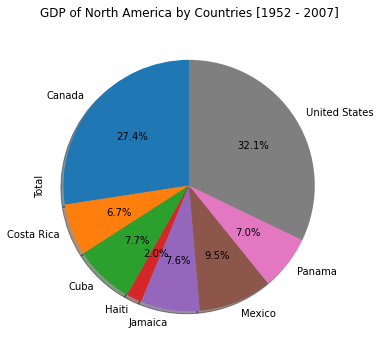

In [6]:
# autopct create %, start angle represent starting point
df_countries['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('GDP of North America by Countries [1952 - 2007]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let us make a few modifications to improve the visuals:

* Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
* Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
* Pass in a custom set of colors for continents by passing in `colors` parameter.
* **Explode** the pie chart to emphasize the  top 3 countries with lowest GDP by pasing in `explode` parameter.


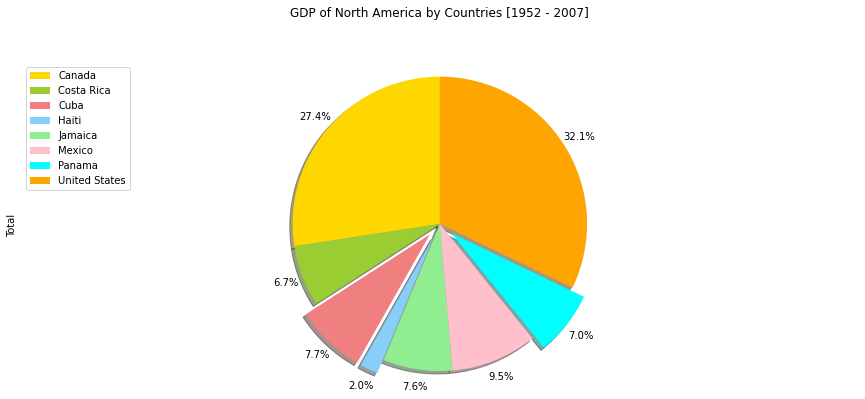

In [7]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'cyan', 'orange']
explode_list = [0, 0, 0.1, 0.1, 0, 0, 0.1, 0] # ratio for each continent with which to offset each wedge.

df_countries['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('GDP of North America by Countries [1952 - 2007]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_countries.index, loc='upper left') 

plt.show()

## Hand-on Practice

Here you will put your knowledge into action:
    
Access the data set for Europe [here](https://raw.githubusercontent.com/arpgpt/data-visualization/master/europe_pie.csv) and implement what you learnt in the lab!

Happy Learning!